## PeerLoanKart - Loan Repayment Prediction Project

***
_**Importing the required libraries & packages**_

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ydata_profiling as pf
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')

_**Changing The Default Working Directory Path & Reading the Dataset using Pandas Command and displaying the first five observations in the DataFrame**_

In [2]:
os.chdir('C:\\Users\\mural\\Desktop\\New folder')
df = pd.read_csv('loan_data.csv')
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

## Exploratory Data Analysis(EDA)

_**Getting the shape of the DataFrame**_

In [3]:
df.shape

(9578, 14)

_**Checking for the duplicate values in the DataFrame**_

In [4]:
df.duplicated().sum()

0

_**Checking for the null values in all the columns from the DataFrame**_

In [5]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

_**Getting the Data types and Non-null count of all the columns from the DataFrame using <span style = 'background : green'><span style = 'color : white'> .info() </span> </span> statement**_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


_**Getting the summary of various descriptive statistics for all the numeric columns in the DataFrame and Transposing it for the better view**_

In [7]:
df.describe().T

count          mean           std         min  \
credit.policy      9578.0      0.804970      0.396245    0.000000   
int.rate           9578.0      0.122640      0.026847    0.060000   
installment        9578.0    319.089413    207.071301   15.670000   
log.annual.inc     9578.0     10.932117      0.614813    7.547502   
dti                9578.0     12.606679      6.883970    0.000000   
fico               9578.0    710.846314     37.970537  612.000000   
days.with.cr.line  9578.0   4560.767197   2496.930377  178.958333   
revol.bal          9578.0  16913.963876  33756.189557    0.000000   
revol.util         9578.0     46.799236     29.014417    0.000000   
inq.last.6mths     9578.0      1.577469      2.200245    0.000000   
delinq.2yrs        9578.0      0.163708      0.546215    0.000000   
pub.rec            9578.0      0.062122      0.262126    0.000000   
not.fully.paid     9578.0      0.160054      0.366676    0.000000   

                           25%          50%           75%           max  
credit.policy         1.000000     1.000000      1.000000  1.000000e+00  
int.rate              0.103900     0.122100      0.140700  2.164000e-01  
installment         163.770000   268.950000    432.762500  9.401400e+02  
log.annual.inc       10.558414    10.928884     11.291293  1.452835e+01  
dti                   7.212500    12.665000     17.950000  2.996000e+01  
fico                682.000000   707.000000    737.000000  8.270000e+02  
days.with.cr.line  2820.000000  4139.958333   5730.000000  1.763996e+04  
revol.bal          3187.000000  8596.000000  18249.500000  1.207359e+06  
revol.util           22.600000    46.300000     70.900000  1.190000e+02  
inq.last.6mths        0.000000     1.000000      2.000000  3.300000e+01  
delinq.2yrs           0.000000     0.000000      0.000000  1.300000e+01  
pub.rec               0.000000     0.000000      0.000000  5.000000e+00  
not.fully.paid        0.000000     0.000000      0.000000  1.000000e+00

**Getting the correlation matrix for all the the numeric columns in the DataFrame**

In [8]:
df.corr()

credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0.158119  0.159552     0.049955       -0.033439   

                        dti      fico  days.with.cr.line  revol.bal  \
credit.policy     -0.090901  0.348319           0.099026  -0.187518   
int.rate           0.220006 -0.714821          -0.124022   0.092527   
installment        0.050202  0.086039           0.183297   0.233625   
log.annual.inc    -0.054065  0.114576           0.336896   0.372140   
dti                1.000000 -0.241191           0.060101   0.188748   
fico              -0.241191  1.000000           0.263880  -0.015553   
days.with.cr.line  0.060101  0.263880           1.000000   0.229344   
revol.bal          0.188748 -0.015553           0.229344   1.000000   
revol.util         0.337109 -0.541289          -0.024239   0.203779   
inq.last.6mths     0.029189 -0.185293          -0.041736   0.022394   
delinq.2yrs       -0.021792 -0.216340           0.081374  -0.033243   
pub.rec            0.006209 -0.147592           0.071826  -0.031010   
not.fully.paid     0.037362 -0.149666          -0.029237   0.053699   

                   revol.util  inq.last.6mths  delinq.2yrs   pub.rec  \
credit.policy       -0.104095       -0.535511    -0.076318 -0.054243   
int.rate             0.464837        0.202780     0.156079  0.098162   
installment          0.081356       -0.010419    -0.004368 -0.032760   
log.annual.inc       0.054881        0.029171     0.029203  0.016506   
dti                  0.337109        0.029189    -0.021792  0.006209   
fico                -0.541289       -0.185293    -0.216340 -0.147592   
days.with.cr.line   -0.024239       -0.041736     0.081374  0.071826   
revol.bal            0.203779        0.022394    -0.033243 -0.031010   
revol.util           1.000000       -0.013880    -0.042740  0.066717   
inq.last.6mths      -0.013880        1.000000     0.021245  0.072673   
delinq.2yrs         -0.042740        0.021245     1.000000  0.009184   
pub.rec              0.066717        0.072673     0.009184  1.000000   
not.fully.paid       0.082088        0.149452     0.008881  0.048634   

                   not.fully.paid  
credit.policy           -0.158119  
int.rate                 0.159552  
installment              0.049955  
log.annual.inc          -0.033439  
dti                      0.037362  
fico                    -0.149666  
days.with.cr.line       -0.029237  
revol.bal                0.053699  
revol.util               0.082088  
inq.last.6mths           0.149452  
delinq.2yrs              0.008881  
pub.rec                  0.048634  
not.fully.paid           1.000000

_**Automated Exploratory Data Analysis (EDA) with ydata_profiling(pandas_profiling) exporting it <span style = 'color : green'> .html </span> </span> file and Displaying the result**_

In [9]:
EDA_Report = pf.ProfileReport(df)
EDA_Report.to_file("EDA_Report.html")
EDA_Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data VIsulaization

**plotting the Bar Graph with count of customers borrowed loan for various purposes with their repayment count got from `purpopse`, `not.fully.paid` column and identifying the customer who are not paid their loan based on the purpose of loan from the DataFrame and saving the PNG file**

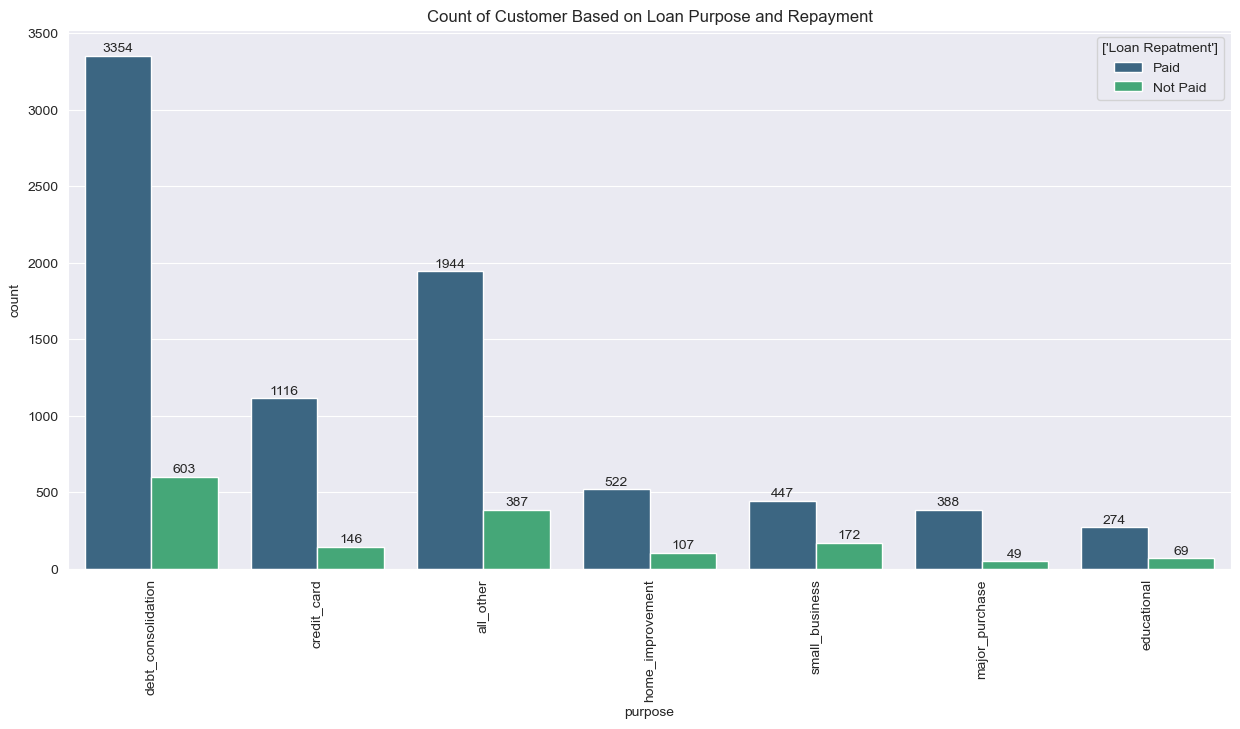

In [10]:
plt.rcParams['figure.figsize'] = 15,7
sns.set_style('darkgrid')
plot = sns.countplot(x = df['purpose'], hue = df['not.fully.paid'],palette = 'viridis')
plt.xticks(rotation= 90)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                  ha ='center', va= 'center',xytext =(0,5),textcoords ='offset points')
plt.title('Count of Customer Based on Loan Purpose and Repayment')
plt.savefig('Count of Customer Based on Loan Purpose and Repayment.png')
plt.legend(title = ['Loan Repatment'],labels = ['Paid', 'Not Paid'])
plt.show()

**plotting the Histogram individually to show the distribution of data for both Negative and Positive credit policy based on  `credit.policy` and `fico`(Fair Isaac Corporation) which fairly represent the credit score of the customer and saving the PNG file** 

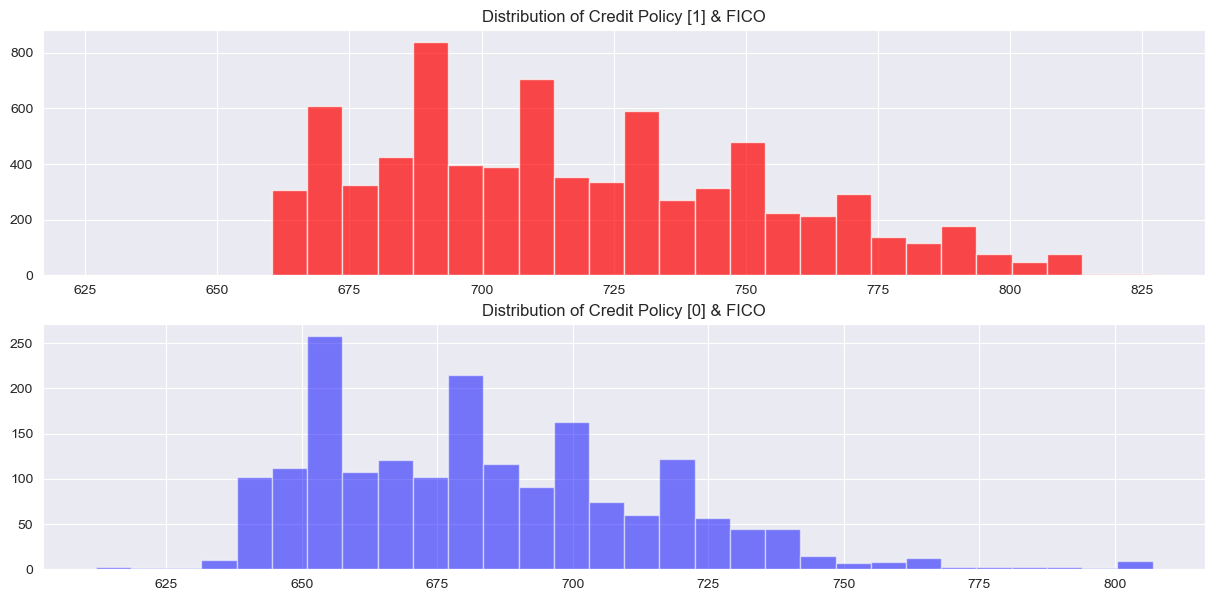

In [11]:
fig, (ax1, ax2) = plt.subplots(sharex = False, sharey = False, nrows = 2, ncols = 1)
df[df['credit.policy'] == 1]['fico'].hist(alpha = 0.7, bins = 30, color = 'r', ax = ax1)
df[df['credit.policy'] == 0]['fico'].hist(alpha = 0.5, bins = 30, color = 'b', ax = ax2)
ax1.set_title('Distribution of Credit Policy [1] & FICO')
ax2.set_title('Distribution of Credit Policy [0] & FICO')
plt.subplots_adjust(hspace = 0.2)
plt.savefig('Data Distribution based on Credit Policy and FICO Score.png')
plt.show()

**plotting the Histogram individually to show the distribution of data for Loan Repayment Status based on `not.fully.paid` and `fico`(Fair Isaac Corporation) which fairly represent the credit score of the customer and saving the PNG file** 

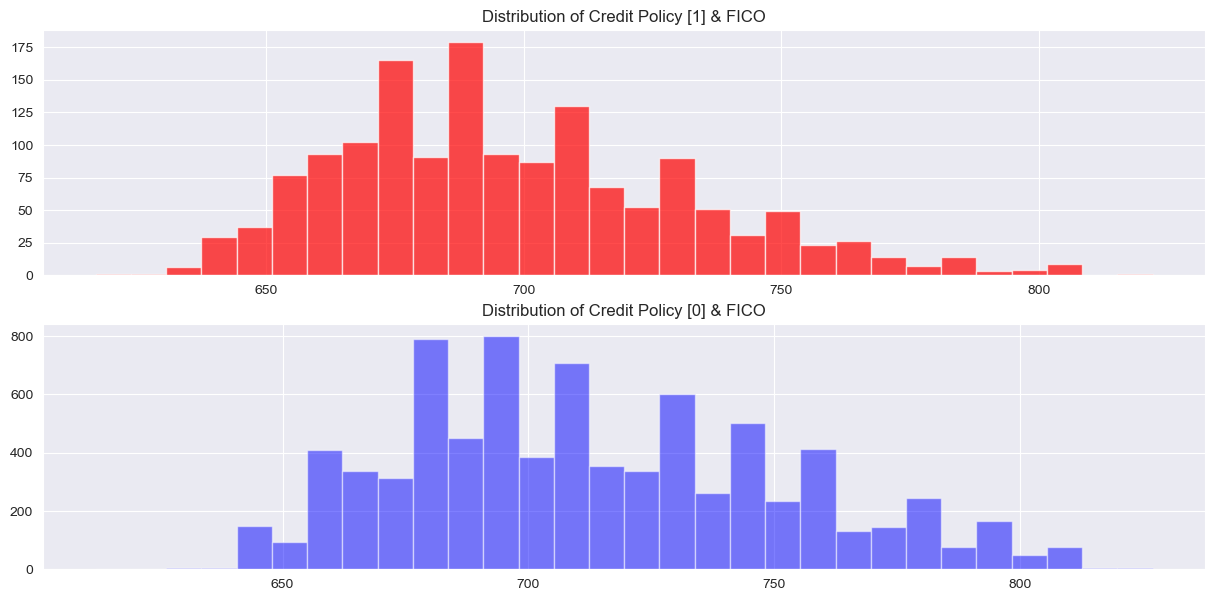

In [12]:
fig, (ax1, ax2) = plt.subplots(sharex = False, sharey = False, nrows = 2, ncols = 1)
df[df['not.fully.paid'] == 1]['fico'].hist(alpha = 0.7, bins = 30, color = 'r', ax = ax1)
df[df['not.fully.paid'] == 0]['fico'].hist(alpha = 0.5, bins = 30, color = 'b', ax = ax2)
ax1.set_title('Distribution of Credit Policy [1] & FICO')
ax2.set_title('Distribution of Credit Policy [0] & FICO')
plt.subplots_adjust(hspace = 0.2)
plt.savefig('Data Distribution based on Loan Repayment Status and FICO Score.png')
plt.show()

**Displaying the value counts of Customer's Loan Purpose based on `purpose` column from the DataFrame and plotting the pie-chart based on the `purpose` column from the DataFrame to show the percentage of Loan Purposes and saving the PNG file**

Purpose of Loan taken by Customers


debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

****************************************************************************************************


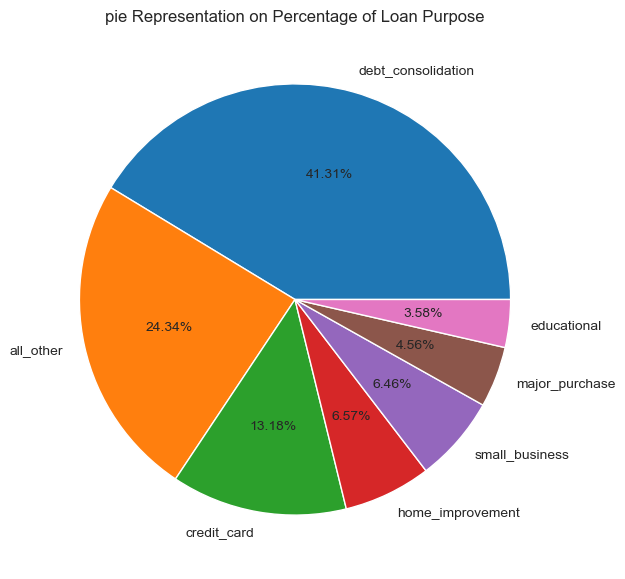

In [13]:
print('Purpose of Loan taken by Customers')
display(df['purpose'].value_counts())
print('*'*100)
data = df['purpose'].value_counts().values
labels = df['purpose'].value_counts().index
plt.pie(data, labels = labels, autopct = '%1.2f%%')
plt.title('pie Representation on Percentage of Loan Purpose')
plt.savefig('Percentage of Loan Purpose.png')
plt.show()

**Displaying the value counts of Customer's Loan Repayment based on `not.fully.paid` column from the DataFrame and plotting the pie-chart based on the `not.fully.paid` column from the DataFrame to show the percentage of Customer's Loan Repayment and saving the PNG file**

Customer's Loan Repayment


paid        8045
Not paid    1533
Name: not.fully.paid, dtype: int64

****************************************************************************************************


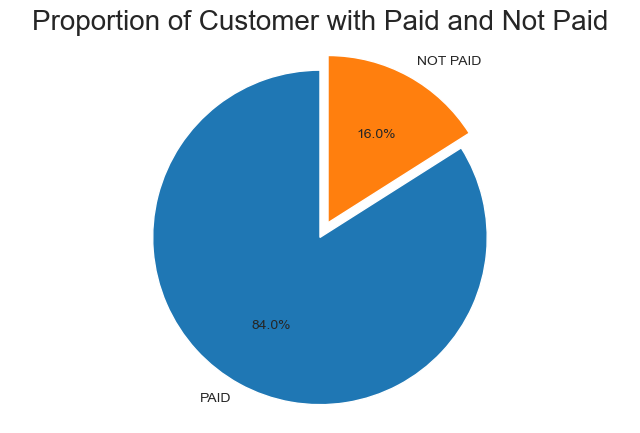

In [14]:
print("Customer's Loan Repayment")
payment_history = df['not.fully.paid'].value_counts()
payment_history.index = ['paid', 'Not paid']
display(payment_history)
print('*'*100)
labels = 'PAID','NOT PAID'
sizes = [df['not.fully.paid'][df['not.fully.paid']==0].count(), df['not.fully.paid'][df['not.fully.paid']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Customer with Paid and Not Paid", size =20)
plt.savefig("Proportion of Customer with Paid and Not Paid.png")
plt.show()

_**Getting the Correlation Values from all the numeric columns from the DataFrame using Seaborn Heatmap & saving the PNG File**_

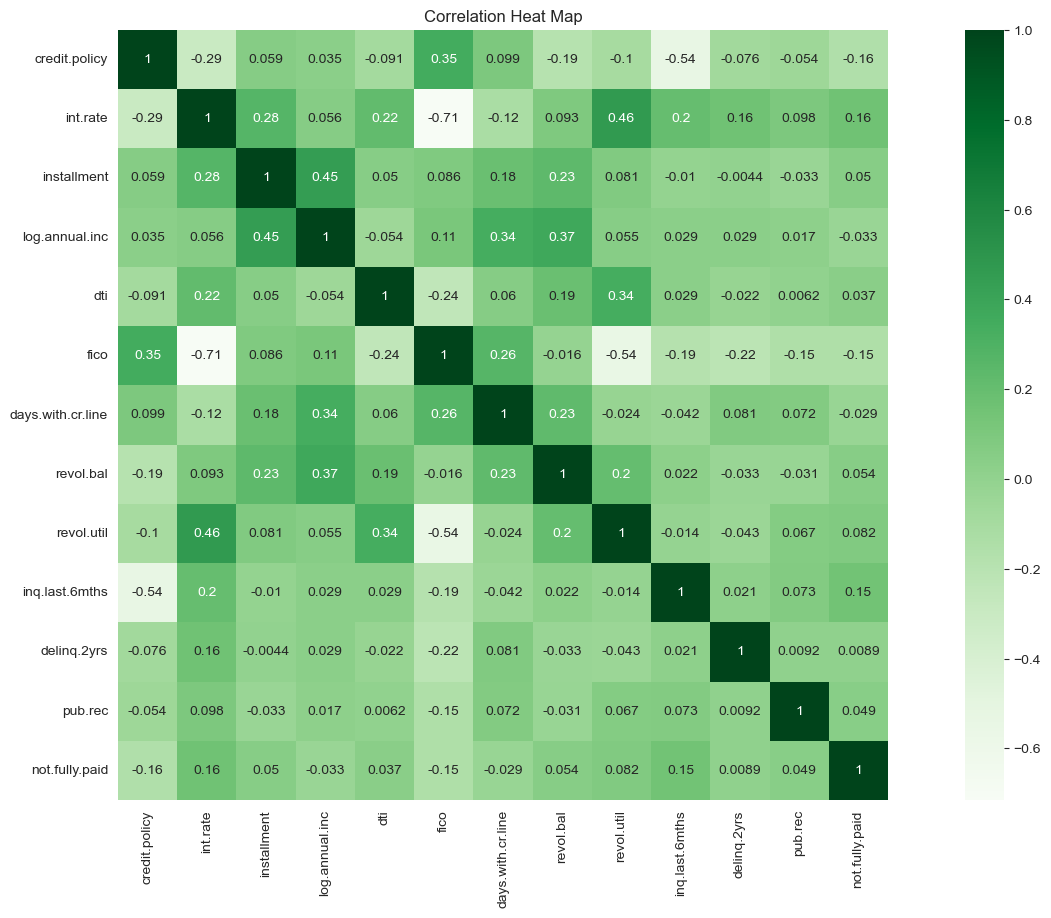

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens',square=True,cbar=True)
plt.title('Correlation Heat Map')
plt.savefig('Correlation Heat Map.png')
plt.show()

## Data Cleaning

**One Hot Encoding the `purpose` column from the DataFrame Using Pandas get dummies function and displaying the DataFrame after One Hot Encoding**

In [16]:
df1 = pd.get_dummies(df, columns = ['purpose'], drop_first = True)
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

**Assigning the dependent and independent variable**

In [17]:
x = df1.drop(['not.fully.paid'], axis = 1)
y = df1['not.fully.paid']

_**Defining the Function for the ML algorithms using <span style="color:purple">GridSearchCV</span> Algorithm and splitting the dependent variable & independent variable into training and test dataset and Predicting the Dependent Variable by fitting the given model and creating the pickle file of the model with the given Algo_name. Further getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**_

In [18]:
def Fitmodel(x, y, algo_name, algorithm, params, cv):
    np.random.seed(50)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 95)
    grid = GridSearchCV(algorithm, params, scoring = 'accuracy', n_jobs = -1, cv = cv, verbose = 0)
    model = grid.fit(x_train, y_train)
    pred = model.predict(x_test)
    best_params = model.best_params_
    pickle.dump(model, open(algo_name,'wb'))
    cm = confusion_matrix(pred, y_test)
    print('Algorithm Name : ',algo_name,'\n')
    print('Best Params : ',best_params,'\n')
    print('Percentage of Accuracy Score : {0:.2f} %'.format(100*(accuracy_score(y_test,pred))),'\n')
    print('Classification Report : \n',classification_report(y_test,pred))
    print('Confusion Matrix : \n',cm,'\n')

**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Logistic Regression </span> </span> model doesn't need any special parameters and fitting the Logistic Regression Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [19]:
params = {}
Fitmodel(x,y,'Logistic Regression',LogisticRegression(),params, cv = 10)

Algorithm Name :  Logistic Regression 

Best Params :  {} 

Percentage of Accuracy Score : 84.10 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.67      0.01      0.02       459

    accuracy                           0.84      2874
   macro avg       0.75      0.50      0.47      2874
weighted avg       0.81      0.84      0.77      2874

Confusion Matrix : 
 [[2413  455]
 [   2    4]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Gaussian Naive Bayes </span> </span> model doesn't need any special parameters and fitting the Gaussian Naive Bayes Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [20]:
params = {}
Fitmodel(x,y, 'GaussianNB',GaussianNB(),params, cv = 10)

Algorithm Name :  GaussianNB 

Best Params :  {} 

Percentage of Accuracy Score : 81.87 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2415
           1       0.30      0.10      0.15       459

    accuracy                           0.82      2874
   macro avg       0.57      0.53      0.52      2874
weighted avg       0.76      0.82      0.78      2874

Confusion Matrix : 
 [[2308  414]
 [ 107   45]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Bernoulli Naive Bayes </span> </span> model doesn't need any special parameters and fitting the Bernoulli Naive Bayes Algorithm and getting the Algorithm Name, Best Parameters of the algorithm,Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [21]:
params = {}
Fitmodel(x,y, 'BernoulliNB',BernoulliNB(),params, cv = 10)

Algorithm Name :  BernoulliNB 

Best Params :  {} 

Percentage of Accuracy Score : 84.13 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.67      0.01      0.03       459

    accuracy                           0.84      2874
   macro avg       0.75      0.51      0.47      2874
weighted avg       0.81      0.84      0.77      2874

Confusion Matrix : 
 [[2412  453]
 [   3    6]] 



_**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Multinomial Naive Bayes </span> </span> model doesn't need any special parameters and fitting the Multinomial Naive Bayes Algorithm and getting the Algorithm Name, Best Parameters of the algorithm,Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**_

In [22]:
params = {}
Fitmodel(x,y, 'MultinomialNB',MultinomialNB(),params, cv = 10)

Algorithm Name :  MultinomialNB 

Best Params :  {} 

Percentage of Accuracy Score : 67.01 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.73      0.79      2415
           1       0.19      0.33      0.24       459

    accuracy                           0.67      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.67      0.70      2874

Confusion Matrix : 
 [[1775  308]
 [ 640  151]] 



**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> KNeighbors Classifier </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm,  Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [23]:
params = {'n_neighbors' : [5,7,9,11,13,15],
         'p' : [1,2]}
Fitmodel(x,y,'KNN Classifier',KNeighborsClassifier(),params, cv = 10)

Algorithm Name :  KNN Classifier 

Best Params :  {'n_neighbors': 15, 'p': 2} 

Percentage of Accuracy Score : 83.75 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.00      0.00      0.00       459

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874

Confusion Matrix : 
 [[2407  459]
 [   8    0]] 



**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> SVC </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [24]:
params = {'C' : [0.01,0.1,1],
         'gamma' : [0.005,0.05,0.01]}
Fitmodel(x,y,'SVC',SVC(),params, cv = 10)

Algorithm Name :  SVC 

Best Params :  {'C': 0.01, 'gamma': 0.005} 

Percentage of Accuracy Score : 84.03 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.00      0.00      0.00       459

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874

Confusion Matrix : 
 [[2415  459]
 [   0    0]] 



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Decision Tree Classifier </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**_

In [25]:
params = {'criterion' : ['gini', 'entropy']}
Fitmodel(x,y,'Decision Tree',DecisionTreeClassifier(),params, cv = 10)

Algorithm Name :  Decision Tree 

Best Params :  {'criterion': 'entropy'} 

Percentage of Accuracy Score : 74.46 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2415
           1       0.23      0.26      0.24       459

    accuracy                           0.74      2874
   macro avg       0.54      0.55      0.55      2874
weighted avg       0.76      0.74      0.75      2874

Confusion Matrix : 
 [[2021  340]
 [ 394  119]] 



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Random Forest Classifier </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm,  Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**_

In [26]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['entropy','gini']}
Fitmodel(x,y,'Random Forest',RandomForestClassifier(), params, cv = 10)

Algorithm Name :  Random Forest 

Best Params :  {'criterion': 'entropy', 'n_estimators': 222} 

Percentage of Accuracy Score : 84.10 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.60      0.01      0.03       459

    accuracy                           0.84      2874
   macro avg       0.72      0.51      0.47      2874
weighted avg       0.80      0.84      0.77      2874

Confusion Matrix : 
 [[2411  453]
 [   4    6]] 



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Extra Trees Classifier </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**_

In [27]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['entropy','gini']}
Fitmodel(x,y,'Extra Trees Classifier',ExtraTreesClassifier(),params, cv = 10)

Algorithm Name :  Extra Trees Classifier 

Best Params :  {'criterion': 'gini', 'n_estimators': 222} 

Percentage of Accuracy Score : 83.86 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2415
           1       0.43      0.03      0.06       459

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.49      2874
weighted avg       0.78      0.84      0.78      2874

Confusion Matrix : 
 [[2395  444]
 [  20   15]] 



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Gradient Boosting Classifier</span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**_

In [28]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['friedman_mse','squared_error']}
Fitmodel(x,y,'Gradient Boosting',GradientBoostingClassifier(),params, cv = 10)

Algorithm Name :  Gradient Boosting 

Best Params :  {'criterion': 'friedman_mse', 'n_estimators': 222} 

Percentage of Accuracy Score : 83.89 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      2415
           1       0.46      0.05      0.09       459

    accuracy                           0.84      2874
   macro avg       0.65      0.52      0.50      2874
weighted avg       0.78      0.84      0.78      2874

Confusion Matrix : 
 [[2387  435]
 [  28   24]] 



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> XGB Classifier</span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**_

In [29]:
params = {'n_estimators' : [111,222,333,444,555]}
Fitmodel(x,y,'XG Boost',XGBClassifier(),params,cv = 10)

Algorithm Name :  XG Boost 

Best Params :  {'n_estimators': 111} 

Percentage of Accuracy Score : 82.78 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      2415
           1       0.32      0.07      0.11       459

    accuracy                           0.83      2874
   macro avg       0.58      0.52      0.51      2874
weighted avg       0.76      0.83      0.78      2874

Confusion Matrix : 
 [[2347  427]
 [  68   32]] 



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> CatBoost Classifier</span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**_

In [30]:
params = {'verbose' : [0]}
Fitmodel(x,y,'CatBoost', CatBoostClassifier(),params, cv = 10)

Algorithm Name :  CatBoost 

Best Params :  {'verbose': 0} 

Percentage of Accuracy Score : 84.03 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      2415
           1       0.50      0.05      0.08       459

    accuracy                           0.84      2874
   macro avg       0.67      0.52      0.50      2874
weighted avg       0.79      0.84      0.78      2874

Confusion Matrix : 
 [[2394  438]
 [  21   21]] 



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> LightGBM Classifier</span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**_

In [31]:
params = {}
Fitmodel(x,y,'LightGBM',LGBMClassifier(),params, cv = 10)

Algorithm Name :  LightGBM 

Best Params :  {} 

Percentage of Accuracy Score : 83.58 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2415
           1       0.39      0.05      0.09       459

    accuracy                           0.84      2874
   macro avg       0.62      0.52      0.50      2874
weighted avg       0.77      0.84      0.78      2874

Confusion Matrix : 
 [[2380  437]
 [  35   22]] 



**Resampling the dependent variable so that the dependent variables values get balanced and assigning the new name for the resampled variable.Displaying the Dependent variable Count before and after oversampling**

In [32]:
print('Before OverSampling')
display (df['not.fully.paid'].value_counts())
sm = SMOTE(random_state = 95)
x_res,y_res = sm.fit_resample(x,y)
print('-'*100)
print('After OverSampling')
display(y_res.value_counts())

Before OverSampling


0    8045
1    1533
Name: not.fully.paid, dtype: int64

----------------------------------------------------------------------------------------------------
After OverSampling


0    8045
1    8045
Name: not.fully.paid, dtype: int64

**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Logistic Regression </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [33]:
params = {}
Fitmodel(x_res,y_res,'Logistic Regression',LogisticRegression(),params, cv = 10)

Algorithm Name :  Logistic Regression 

Best Params :  {} 

Percentage of Accuracy Score : 57.86 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.58      0.58      0.58      2411
           1       0.58      0.58      0.58      2416

    accuracy                           0.58      4827
   macro avg       0.58      0.58      0.58      4827
weighted avg       0.58      0.58      0.58      4827

Confusion Matrix : 
 [[1387 1010]
 [1024 1406]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> GaussianNB </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [34]:
params = {}
Fitmodel(x_res,y_res, 'GaussianNB',GaussianNB(),params, cv = 10)

Algorithm Name :  GaussianNB 

Best Params :  {} 

Percentage of Accuracy Score : 62.05 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.61      0.68      0.64      2411
           1       0.64      0.56      0.60      2416

    accuracy                           0.62      4827
   macro avg       0.62      0.62      0.62      4827
weighted avg       0.62      0.62      0.62      4827

Confusion Matrix : 
 [[1630 1051]
 [ 781 1365]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> BernoulliNB </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [35]:
params = {}
Fitmodel(x_res,y_res, 'BernoulliNB',BernoulliNB(),params, cv = 10)

Algorithm Name :  BernoulliNB 

Best Params :  {} 

Percentage of Accuracy Score : 70.58 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      2411
           1       0.74      0.64      0.69      2416

    accuracy                           0.71      4827
   macro avg       0.71      0.71      0.70      4827
weighted avg       0.71      0.71      0.70      4827

Confusion Matrix : 
 [[1855  864]
 [ 556 1552]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> MultinomialNB </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [36]:
params = {}
Fitmodel(x_res,y_res, 'MultinomialNB',MultinomialNB(),params, cv = 10)

Algorithm Name :  MultinomialNB 

Best Params :  {} 

Percentage of Accuracy Score : 52.06 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.51      0.74      0.61      2411
           1       0.54      0.30      0.39      2416

    accuracy                           0.52      4827
   macro avg       0.53      0.52      0.50      4827
weighted avg       0.53      0.52      0.50      4827

Confusion Matrix : 
 [[1786 1689]
 [ 625  727]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> KNN CLassifier </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [37]:
params = {'n_neighbors' : [5,7,9,11,13,15],
         'p' : [1,2]}
Fitmodel(x_res,y_res,'KNN Classifier',KNeighborsClassifier(),params, cv = 10)

Algorithm Name :  KNN Classifier 

Best Params :  {'n_neighbors': 5, 'p': 1} 

Percentage of Accuracy Score : 74.62 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.62      0.71      2411
           1       0.70      0.87      0.77      2416

    accuracy                           0.75      4827
   macro avg       0.76      0.75      0.74      4827
weighted avg       0.76      0.75      0.74      4827

Confusion Matrix : 
 [[1500  314]
 [ 911 2102]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> SVC Classifier </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [38]:
params = {'C' : [0.01,0.1,1],
         'gamma' : [0.005,0.05,0.01]}
Fitmodel(x_res,y_res,'SVC',SVC(),params, cv = 10)

Algorithm Name :  SVC 

Best Params :  {'C': 1, 'gamma': 0.005} 

Percentage of Accuracy Score : 61.51 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.56      1.00      0.72      2411
           1       1.00      0.23      0.38      2416

    accuracy                           0.62      4827
   macro avg       0.78      0.62      0.55      4827
weighted avg       0.78      0.62      0.55      4827

Confusion Matrix : 
 [[2409 1856]
 [   2  560]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Decision Tree Classifier </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [39]:
params = {'criterion' : ['gini', 'entropy']}
Fitmodel(x_res,y_res,'Decision Tree',DecisionTreeClassifier(),params, cv = 10)

Algorithm Name :  Decision Tree 

Best Params :  {'criterion': 'entropy'} 

Percentage of Accuracy Score : 77.52 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      2411
           1       0.77      0.79      0.78      2416

    accuracy                           0.78      4827
   macro avg       0.78      0.78      0.78      4827
weighted avg       0.78      0.78      0.78      4827

Confusion Matrix : 
 [[1830  504]
 [ 581 1912]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Random Forest Classifier </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [40]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['entropy','gini']}
Fitmodel(x_res,y_res,'Random Forest',RandomForestClassifier(), params, cv = 10)

Algorithm Name :  Random Forest 

Best Params :  {'criterion': 'gini', 'n_estimators': 555} 

Percentage of Accuracy Score : 84.46 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      2411
           1       0.87      0.81      0.84      2416

    accuracy                           0.84      4827
   macro avg       0.85      0.84      0.84      4827
weighted avg       0.85      0.84      0.84      4827

Confusion Matrix : 
 [[2113  452]
 [ 298 1964]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Extra Tree Classifier </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [41]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['entropy','gini']}
Fitmodel(x_res,y_res,'Extra Trees',ExtraTreesClassifier(),params, cv = 10)

Algorithm Name :  Extra Trees 

Best Params :  {'criterion': 'gini', 'n_estimators': 222} 

Percentage of Accuracy Score : 84.07 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      2411
           1       0.85      0.83      0.84      2416

    accuracy                           0.84      4827
   macro avg       0.84      0.84      0.84      4827
weighted avg       0.84      0.84      0.84      4827

Confusion Matrix : 
 [[2064  422]
 [ 347 1994]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Gradient Boosting Classifier</span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [42]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['friedman_mse','squared_error'],
          'loss' : ['deviance','exponential']}
Fitmodel(x_res,y_res,'Gradient Boosting',GradientBoostingClassifier(),params, cv = 10)

Algorithm Name :  Gradient Boosting 

Best Params :  {'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 555} 

Percentage of Accuracy Score : 84.36 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2411
           1       0.88      0.80      0.84      2416

    accuracy                           0.84      4827
   macro avg       0.85      0.84      0.84      4827
weighted avg       0.85      0.84      0.84      4827

Confusion Matrix : 
 [[2141  485]
 [ 270 1931]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> XGBoost Classifier </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [43]:
params = {'n_estimators' : [111,222,333,444,555]}
Fitmodel(x_res,y_res,'XG Boost',XGBClassifier(),params,cv = 10)

Algorithm Name :  XG Boost 

Best Params :  {'n_estimators': 333} 

Percentage of Accuracy Score : 87.07 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      2411
           1       0.90      0.84      0.87      2416

    accuracy                           0.87      4827
   macro avg       0.87      0.87      0.87      4827
weighted avg       0.87      0.87      0.87      4827

Confusion Matrix : 
 [[2175  388]
 [ 236 2028]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> CatBoost CLassifier </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [44]:
params = {'verbose' : [0]}
Fitmodel(x_res,y_res,'CatBoost', CatBoostClassifier(),params, cv = 10)

Algorithm Name :  CatBoost 

Best Params :  {'verbose': 0} 

Percentage of Accuracy Score : 85.25 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      2411
           1       0.89      0.81      0.85      2416

    accuracy                           0.85      4827
   macro avg       0.86      0.85      0.85      4827
weighted avg       0.86      0.85      0.85      4827

Confusion Matrix : 
 [[2162  463]
 [ 249 1953]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> LightGBM CLassifier </span> </span> model doesn't need any special parameters and with resample the dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**

In [45]:
params = {}
Fitmodel(x_res,y_res,'LightGBM',LGBMClassifier(),params, cv = 10)

Algorithm Name :  LightGBM 

Best Params :  {} 

Percentage of Accuracy Score : 84.13 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.88      0.85      2411
           1       0.87      0.80      0.83      2416

    accuracy                           0.84      4827
   macro avg       0.84      0.84      0.84      4827
weighted avg       0.84      0.84      0.84      4827

Confusion Matrix : 
 [[2132  487]
 [ 279 1929]] 



**Splitting the original dependent & independent variable into training and test dataset.Fitting the Gradient Boosting Classifier model with the original train dependent and train independent variable and Displaying the Accuracy of Gradient Boosting, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset**

In [46]:
np.random.seed(50)
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.3,random_state = 95)
grade = GradientBoostingClassifier (criterion = 'friedman_mse', loss = 'exponential', n_estimators = 111)
fit = grade.fit(x_train, y_train)
accuracy = fit.score (x_test,y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix(y_test, predict)
print('Accuracy of Gradient Boosting', (accuracy))
print('Accuracy Score',(accuracy_score(y_test,predict)))
print ('Classification Report:', classification_report(y_test,predict))
print('Confusion Matrix : \n',cmatrix)

Accuracy of Gradient Boosting 0.779573233892687
Accuracy Score 0.779573233892687
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.81      0.79      2411
           1       0.80      0.75      0.77      2416

    accuracy                           0.78      4827
   macro avg       0.78      0.78      0.78      4827
weighted avg       0.78      0.78      0.78      4827

Confusion Matrix : 
 [[1949  462]
 [ 602 1814]]


**Finding the feature importance of all the columns in the independent variable with respect to Gradient Boosting CLassification Model above predicted for the dimensional reduction process**

In [47]:
importances = grade.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x.shape[1]):
    print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))

Feature Ranking:
Feature credit.policy (0.247219)
Feature int.rate (0.129173)
Feature installment (0.128715)
Feature log.annual.inc (0.104963)
Feature dti (0.049293)
Feature fico (0.041338)
Feature days.with.cr.line (0.036104)
Feature revol.bal (0.035030)
Feature revol.util (0.030076)
Feature inq.last.6mths (0.029359)
Feature delinq.2yrs (0.028139)
Feature pub.rec (0.025396)
Feature purpose_credit_card (0.024758)
Feature purpose_debt_consolidation (0.024656)
Feature purpose_educational (0.020930)
Feature purpose_home_improvement (0.019367)
Feature purpose_major_purchase (0.019297)
Feature purpose_small_business (0.006187)


**Plotting the bar graph to represnt the feature Importances of the independent variable column from the Gradient Boosting Classification model before oversampling and saving the PNG file.**

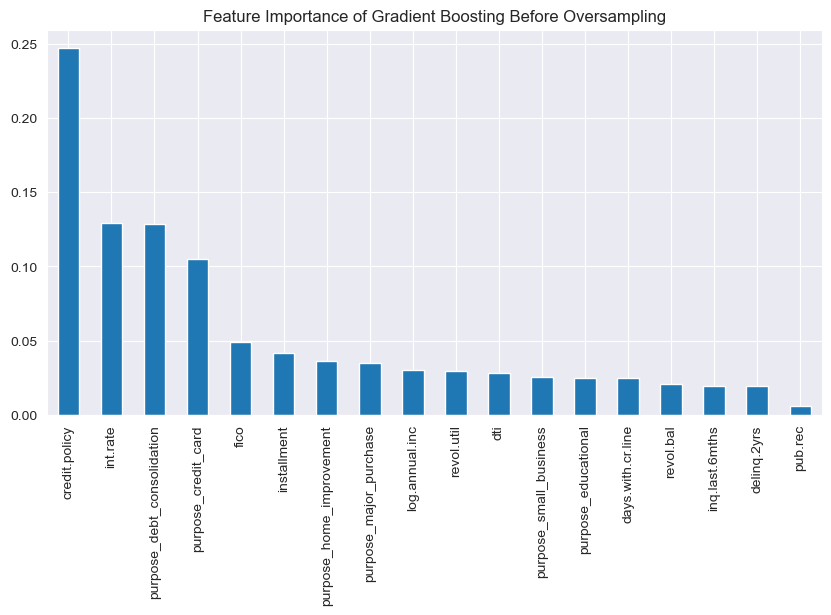

In [48]:
pd.Series(grade.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title('Feature Importance of Gradient Boosting Before Oversampling')
plt.savefig('Feature Importance of Gradient Boosting Before Oversampling.png')
plt.show()

**Splitting the original dependent & independent variable into training and test dataset.Fitting the XGB Classifier model with the original train dependent and train independent variable and Displaying the Accuracy of XGB Classifier, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset**

In [49]:
np.random.seed(50)
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.3,random_state = 95)
xgbc = XGBClassifier (n_estimators = 333)
fit = xgbc.fit(x_train, y_train)
accuracy = fit.score (x_test,y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix(y_test, predict)
print('Accuracy of XGBoost', (accuracy))
print ('Classification Report:', classification_report(y_test,predict))
print('Accuracy Score',(accuracy_score(y_test,predict)))
print ('Classification Report:', classification_report(y_test,predict))
print('Confusion Matrix : \n',cmatrix)

Accuracy of XGBoost 0.8707271597265382
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.90      0.87      2411
           1       0.90      0.84      0.87      2416

    accuracy                           0.87      4827
   macro avg       0.87      0.87      0.87      4827
weighted avg       0.87      0.87      0.87      4827

Accuracy Score 0.8707271597265382
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.90      0.87      2411
           1       0.90      0.84      0.87      2416

    accuracy                           0.87      4827
   macro avg       0.87      0.87      0.87      4827
weighted avg       0.87      0.87      0.87      4827

Confusion Matrix : 
 [[2175  236]
 [ 388 2028]]


**Finding the feature importance of all the columns in the independent variable with respect to XGB CLassification Model above predicted for the dimensional reduction process**

In [50]:
importances = xgbc.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x.shape[1]):
    print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))

Feature Ranking:
Feature credit.policy (0.221651)
Feature int.rate (0.155814)
Feature installment (0.136330)
Feature log.annual.inc (0.129844)
Feature dti (0.090314)
Feature fico (0.055969)
Feature days.with.cr.line (0.052726)
Feature revol.bal (0.025592)
Feature revol.util (0.023550)
Feature inq.last.6mths (0.019663)
Feature delinq.2yrs (0.019002)
Feature pub.rec (0.010671)
Feature purpose_credit_card (0.010092)
Feature purpose_debt_consolidation (0.010046)
Feature purpose_educational (0.010001)
Feature purpose_home_improvement (0.009897)
Feature purpose_major_purchase (0.009733)
Feature purpose_small_business (0.009105)


**Plotting the bar graph to represnt the feature importances of the independent variable column and saving the PNG file.**

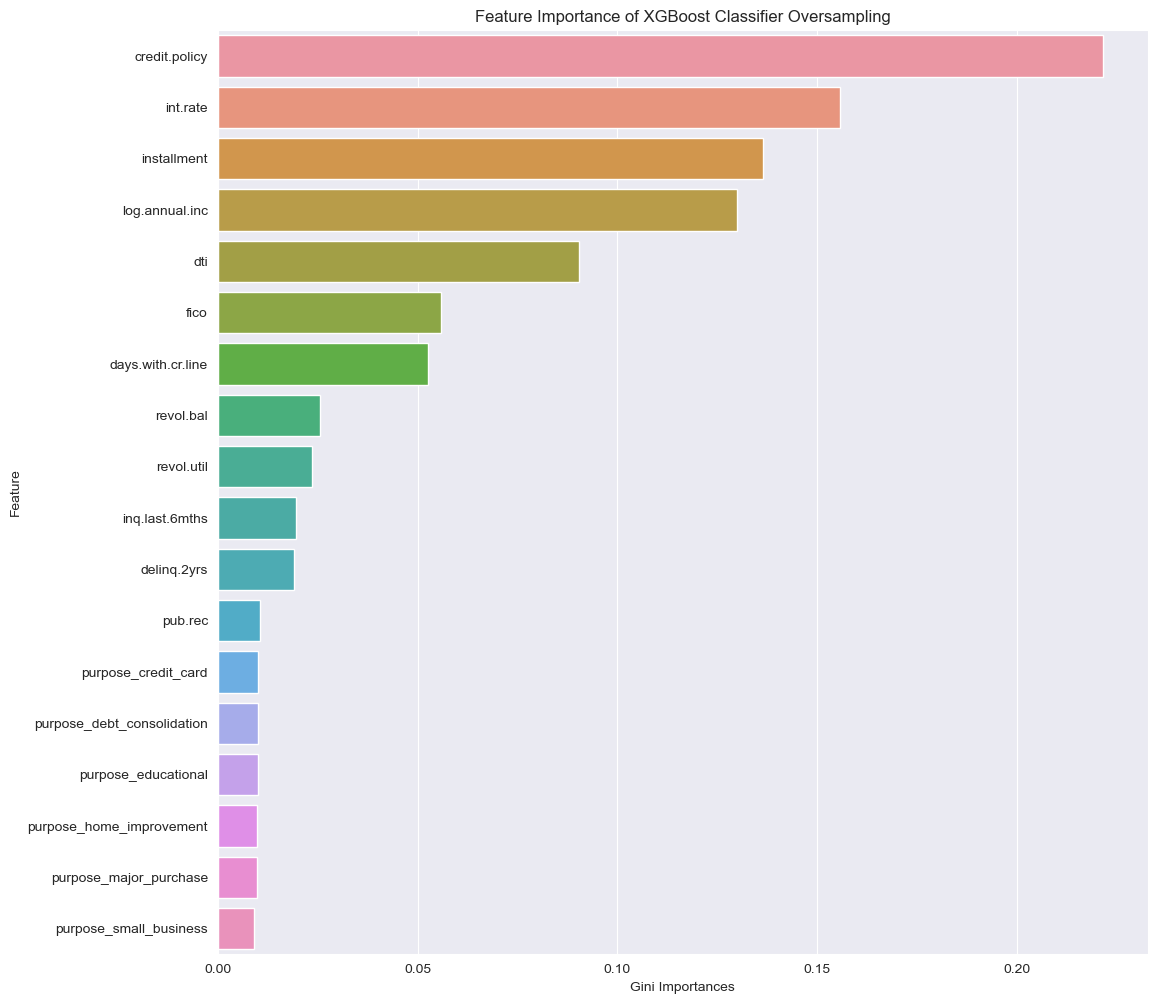

In [51]:
feat_imp = pd.DataFrame({'Feature': list(x), 'Gini importance': importances[indices]})
plt.rcParams['figure.figsize']= (12,12)
ax= sns.barplot(x ='Gini importance', y = 'Feature', data = feat_imp  )
ax.set (xlabel = 'Gini Importances')
plt.title('Feature Importance of XGBoost Classifier Oversampling')
plt.savefig('Feature Importance of XGBoost Classifier Oversampling.png')
plt.show()

**With respect to feature importance of the independent variable reducing the dimensions of independent variable for reducing the complexity of model fitting.**

In [52]:
feat_imp.index = feat_imp.Feature
feat_to_keep = feat_imp.iloc[:11].index
display (type(feat_to_keep),feat_to_keep)

pandas.core.indexes.base.Index

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs'],
      dtype='object', name='Feature')

**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> XGB Classifier </span> </span> Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name XG Boost_resample**

In [53]:
params = {'n_estimators' : [111,222,333,444,555]}
Fitmodel(x_res[feat_to_keep],y_res,'XG Boost_resample',XGBClassifier(),params,cv = 10)

Algorithm Name :  XG Boost_resample 

Best Params :  {'n_estimators': 444} 

Percentage of Accuracy Score : 86.70 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      2411
           1       0.89      0.83      0.86      2416

    accuracy                           0.87      4827
   macro avg       0.87      0.87      0.87      4827
weighted avg       0.87      0.87      0.87      4827

Confusion Matrix : 
 [[2171  402]
 [ 240 2014]] 



**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Random Forest Classifier </span> </span> Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name Random Forest_resample**

In [54]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['entropy','gini']}
Fitmodel(x_res[feat_to_keep],y_res,'Random Forest_resample',RandomForestClassifier(), params, cv = 10)

Algorithm Name :  Random Forest_resample 

Best Params :  {'criterion': 'gini', 'n_estimators': 444} 

Percentage of Accuracy Score : 84.26 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2411
           1       0.85      0.84      0.84      2416

    accuracy                           0.84      4827
   macro avg       0.84      0.84      0.84      4827
weighted avg       0.84      0.84      0.84      4827

Confusion Matrix : 
 [[2048  397]
 [ 363 2019]] 



**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Extra Trees Classifier </span> </span> Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name Extra Trees_resample**

In [55]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['entropy','gini']}
Fitmodel(x_res[feat_to_keep],y_res,'Extra Trees_resample',ExtraTreesClassifier(),params, cv = 10)

Algorithm Name :  Extra Trees_resample 

Best Params :  {'criterion': 'gini', 'n_estimators': 555} 

Percentage of Accuracy Score : 83.86 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      2411
           1       0.84      0.84      0.84      2416

    accuracy                           0.84      4827
   macro avg       0.84      0.84      0.84      4827
weighted avg       0.84      0.84      0.84      4827

Confusion Matrix : 
 [[2028  396]
 [ 383 2020]] 



**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Gradient Boosting Classifier </span> </span> Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name Gradient Boost_resample.**

In [56]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['friedman_mse','squared_error'],
          'loss' : ['deviance','exponential']}
Fitmodel(x_res[feat_to_keep],y_res,'Gradient Boosting_resample',GradientBoostingClassifier(),params, cv = 10)

Algorithm Name :  Gradient Boosting_resample 

Best Params :  {'criterion': 'squared_error', 'loss': 'deviance', 'n_estimators': 555} 

Percentage of Accuracy Score : 84.17 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      2411
           1       0.89      0.78      0.83      2416

    accuracy                           0.84      4827
   macro avg       0.85      0.84      0.84      4827
weighted avg       0.85      0.84      0.84      4827

Confusion Matrix : 
 [[2180  533]
 [ 231 1883]] 



**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> CatBoost Classifier </span> </span> Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name CatBoost_resample**

In [57]:
params = {'verbose' : [0]}
Fitmodel(x_res[feat_to_keep],y_res,'CatBoost_resample', CatBoostClassifier(),params, cv = 10)

Algorithm Name :  CatBoost_resample 

Best Params :  {'verbose': 0} 

Percentage of Accuracy Score : 84.79 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      2411
           1       0.90      0.79      0.84      2416

    accuracy                           0.85      4827
   macro avg       0.85      0.85      0.85      4827
weighted avg       0.85      0.85      0.85      4827

Confusion Matrix : 
 [[2192  515]
 [ 219 1901]] 



**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> LightGBM Classifier </span> </span> model doesn't need any special parameters and fitting the LightGBM Classifier Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name LightGBM_resample**

In [58]:
params = {}
Fitmodel(x_res[feat_to_keep],y_res,'LightGBM_resample',LGBMClassifier(),params, cv = 10)

Algorithm Name :  LightGBM_resample 

Best Params :  {} 

Percentage of Accuracy Score : 84.55 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      2411
           1       0.89      0.79      0.84      2416

    accuracy                           0.85      4827
   macro avg       0.85      0.85      0.85      4827
weighted avg       0.85      0.85      0.84      4827

Confusion Matrix : 
 [[2170  505]
 [ 241 1911]] 



**Loading the pickle file with algorithm which gives highest accuracy score.**

In [59]:
model = pickle.load(open('XG Boost','rb'))

**predicting the independent test variable using the loaded pickle file and displaying the percentage of Accuracy Score between Test dependent variable and predicted value and also parameters of the loaded pickle file.**

In [60]:
pred1 = model.predict (x_test)
print('Percentage of Accuracy Score for Best fitted Model of Test Data: {:.2f} %'.format(100*(accuracy_score(y_test,pred1))))
print('Params for Best Fitted Model :', model.best_params_)

Percentage of Accuracy Score for Best fitted Model of Test Data: 87.07 %
Params for Best Fitted Model : {'n_estimators': 333}


**Predicting the Loan Repayment Status using the Loaded pickle file and displaying the percentage of Accuracy Score between Whole dependent variable and predicted Value**

In [61]:
fpred = model.predict(x)
print('Percentage of Accuracy Score for Best fitted Model of Test Data: {:.2f} %'.format(100*(accuracy_score(y,fpred))))

Percentage of Accuracy Score for Best fitted Model of Test Data: 94.02 %


**Making the predicted value as DataFrame with column name and mapping the predicted to appropriate Loan Status term for better readability**

In [62]:
fpred_df = pd.DataFrame(fpred, columns = ['Predicted Loan Repayment Status'])
fpred_df['Predicted Loan Repayment Status'] = fpred_df['Predicted Loan Repayment Status'].map({0 : 'paid', 1 : 'Not Paid'})

**Renaming the Dependent variable column from the original given DataFrame for futher processing and Mapping the values to  Loan Status term for better readability**

In [63]:
df = df.rename(columns = {'not.fully.paid' :'Loan Repayment Status'})
df['Loan Repayment Status'] = df['Loan Repayment Status'].map({0: 'paid', 1 : 'Not paid'})

**Concating the Original DataFrame after Preprocessing and predicted DataFrame as Final DataFrame and displaying the first five Observations in the Final DataFrame**

In [64]:
final_data = pd.concat([df, fpred_df], axis = 1)
final_data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec Loan Repayment Status Predicted Loan Repayment Status  
0            0        0                  paid                            paid  
1            0        0                  paid                            paid  
2            0        0                  paid                            paid  
3            0        0                  paid                            paid  
4            1        0                  paid                            paid

**Exporting the final DataFrame with Actual Loan Repayment Status and predicted Loan Repayment Status to CSV(Comma Seperated value) file**

In [65]:
final_data.to_csv('Loan Status Prediction.csv', index = False)